In [1]:
from pathlib import Path
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib as mpl
from tqdm.auto import tqdm
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap
from sklearn.cluster import KMeans
import utils
import sys
import os
import numpy as np
from environment import CONTEXTS_LABELS
#from agent import neural_network
import seaborn as sns
from agent import DQN
import pandas as pd
from scipy.spatial.distance import pdist
import random
import heapq

In [2]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
save_path = Path("save")
save_path.exists()

True

### Left/Right Agents Data

In [4]:
data_dir_lr = save_path / "7-8-LR"
data_dir_lr.exists()

True

In [5]:
data_path_lr = data_dir_lr / "data.tar"
data_path_lr.exists()

True

In [6]:
data_dict_lr = torch.load(data_path_lr, weights_only=False, map_location=DEVICE)
data_dict_lr.keys()

dict_keys(['rewards', 'steps', 'episodes', 'all_states', 'all_actions', 'all_qvalues', 'losses', 'p', 'epsilons', 'weights_val_stats', 'biases_val_stats', 'weights_grad_stats', 'biases_grad_stats', 'net', 'env', 'weights', 'biases'])

### East/West Agents Data

In [7]:
data_dir_ew = save_path / "7-8-EW"
data_dir_ew.exists()

True

In [8]:
data_path_ew = data_dir_ew / "data.tar"
data_path_ew.exists()

True

In [9]:
data_dict_ew = torch.load(data_path_ew, weights_only=False, map_location=DEVICE)
data_dict_ew.keys()

dict_keys(['rewards', 'steps', 'episodes', 'all_states', 'all_actions', 'all_qvalues', 'losses', 'p', 'epsilons', 'weights_val_stats', 'biases_val_stats', 'weights_grad_stats', 'biases_grad_stats', 'net', 'env', 'weights', 'biases'])

### Loading General Model (ASSUMING MODEL ARCH. IS SAME ACROSS CAT.)

In [10]:
parameters = data_dict_ew['p']
n_observations = parameters.n_observations
n_actions = parameters.n_actions
n_units = parameters.n_hidden_units

In [11]:
model = DQN(n_observations, n_actions, n_units)

## QQ Plots

In [27]:
# Helper Function for getting cluster nodes

def get_cluster_members(Z, cluster_idx, n_leaves):
    """Returns the leaf indices in a cluster"""
    if cluster_idx < n_leaves:
        return [int(cluster_idx)]
    else:
        c1, c2 = int(Z[cluster_idx - n_leaves][0]), int(Z[cluster_idx - n_leaves][1])
        return get_cluster_members(Z, c1, n_leaves) + get_cluster_members(Z, c2, n_leaves)

In [28]:
all_cluster_dfs = {}

(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)


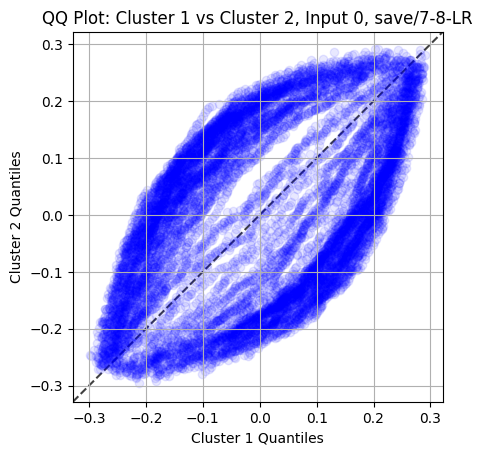

(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)
(130816,)


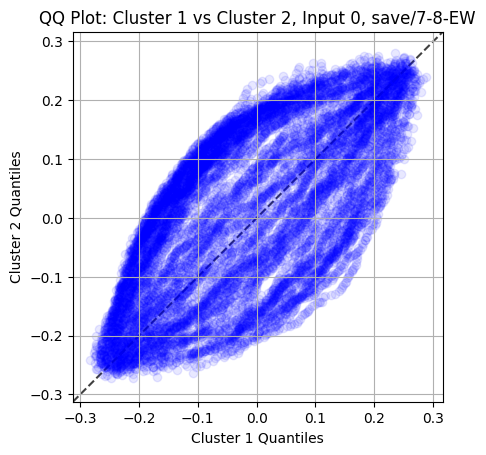

In [30]:
num_agents = 100
layer = 0 # which layer you want to look at
node_idx = 0 # which node you want to look at
incoming = True # whether you want to cluster based on incoming or outgoing weights
cluster_idx = 510 # which cluster joining you want to look at ; 510 is the top ; 509 would be one side, 508 the other

#rmse_df_508 = pd.DataFrame() # DataFrame to store RMSE for each input -- each QQ plot has an RMSE -- measures quantile differences

#rmse_list = []

for cat in [data_dir_lr, data_dir_ew]:

    fig, ax = plt.subplots()

    for i in range(num_agents):
        
        # Loading Agent Model
        model_path = cat / f'trained-agent-state-{i}.pt'
        model.load_state_dict(torch.load(model_path, weights_only=True, map_location=torch.device('cpu')))
        model.eval()

        # Extracting Model Weights
        state_dict = model.state_dict()
        layer0_weights = state_dict['mlp.0.weight']
        layer1_weights = state_dict['mlp.1.weight']
        layer2_weights = state_dict['mlp.3.weight']
        layer3_weights = state_dict['mlp.5.weight']
        layer4_weights = state_dict['mlp.7.weight']
        weights = [layer0_weights,layer1_weights,layer2_weights,layer3_weights,layer4_weights]

        # Perform Hierarchical Clustering for Agent Weights
        if incoming:
            W = weights[layer].detach().numpy()
        else:
            W = weights[layer].detach().numpy().T
        distance_matrix = pdist(W, metric='euclidean')
        print(distance_matrix.shape)
        linked = linkage(distance_matrix, method='ward')
        first_cluster_id = int(linked[cluster_idx][0])
        second_cluster_id = int(linked[cluster_idx][1])

        # Plot dendrogram
        # plt.figure(figsize=(10, 5))
        # dendrogram(linked)
        # plt.title(f"Hierarchical Clustering of Nodes in Layer {layer} - Agent {i}", fontsize=20)
        # plt.xlabel("Node Index", fontsize=15)
        # plt.ylabel("Distance", fontsize=15)
        # plt.savefig('figures/hierclusteringlayer0a3.png', dpi=300)
        # plt.show()

        # Extract Nodes of Each Cluster
        n = W.shape[0]
        first_cluster_nodes = get_cluster_members(linked, first_cluster_id, n)
        cluster_weights = W[first_cluster_nodes]
        cluster_1_weights = [sublist[node_idx] for sublist in cluster_weights]
        second_cluster_nodes = get_cluster_members(linked, second_cluster_id, n)
        cluster_weights = W[second_cluster_nodes]
        cluster_2_weights = [sublist[node_idx] for sublist in cluster_weights]

        # Plot the QQ Plot of Cluster Distributions
        quantiles = np.linspace(0.01, 0.99, 100)
        q0 = np.quantile(cluster_1_weights, quantiles)
        q1 = np.quantile(cluster_2_weights, quantiles)
        
        ax.scatter(q0, q1, marker='o', color='blue', alpha=0.09)

        #rmse = np.sqrt(np.mean((q1 - q0) ** 2)) # computes quantile difference
        #rmse_list.append(rmse)
        
    #rmse_df_508[f'Input {node_idx}'] = rmse_list
    #all_cluster_dfs['508'] = rmse_df_508

    lims = [
        min(plt.xlim()[0], plt.ylim()[0]),  # smallest of x/y lower limits
        max(plt.xlim()[1], plt.ylim()[1])   # largest of x/y upper limits
    ]
    ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)  # y = x line
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_xlabel('Cluster 1 Quantiles')
    ax.set_ylabel('Cluster 2 Quantiles')
    ax.set_title(f'QQ Plot: Cluster 1 vs Cluster 2, Input {node_idx}, {cat}')
    ax.grid(True)
    ax.set_aspect('equal')
    #plt.savefig(f'figures/qqplots{num_agents}i{node_idx}.png', dpi=300)
    plt.show()

In [15]:
all_node_indices = list(range(512))
print(all_node_indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [16]:
# QUESTION : could also cluster on "just" a particular input, instead of considering all inputs for the clustering?

from scipy.stats import ks_2samp

num_agents = 100
layer = 0 # which layer you want to look at
#node_idx = 0 # which node you want to look at
incoming = True # whether you want to cluster based on incoming or outgoing weights
cluster_idx = 510 # which cluster joining you want to look at ; 510 is the top ; 509 would be one side, 508 the other

#rmse_df_508 = pd.DataFrame() # DataFrame to store RMSE for each input -- each QQ plot has an RMSE -- measures quantile differences

#rmse_list = []

# all_c1_p = []
# all_c2_p = []

for node_idx in tqdm(range(21)):

    for cat in [data_dir_lr, data_dir_ew]:

        

        fig, ax = plt.subplots()

        ks_obs = []
        p_obs = []

        ks_c1 = []
        p_c1 = []

        ks_c2 = []
        p_c2 = []

        for i in range(num_agents):
            
            # Loading Agent Model
            model_path = cat / f'trained-agent-state-{i}.pt'
            model.load_state_dict(torch.load(model_path, weights_only=True, map_location=torch.device('cpu')))
            model.eval()

            # Extracting Model Weights
            state_dict = model.state_dict()
            layer0_weights = state_dict['mlp.0.weight']
            layer1_weights = state_dict['mlp.1.weight']
            layer2_weights = state_dict['mlp.3.weight']
            layer3_weights = state_dict['mlp.5.weight']
            layer4_weights = state_dict['mlp.7.weight']
            weights = [layer0_weights,layer1_weights,layer2_weights,layer3_weights,layer4_weights]

            # Perform Hierarchical Clustering for Agent Weights
            if incoming:
                W = weights[layer].detach().numpy()
            else:
                W = weights[layer].detach().numpy().T
            distance_matrix = pdist(W, metric='euclidean')
            linked = linkage(distance_matrix, method='ward')
            first_cluster_id = int(linked[cluster_idx][0])
            second_cluster_id = int(linked[cluster_idx][1])

            # Plot dendrogram
            # plt.figure(figsize=(10, 5))
            # dendrogram(linked)
            # plt.title(f"Hierarchical Clustering of Nodes in Layer {layer} - Agent {i}", fontsize=20)
            # plt.xlabel("Node Index", fontsize=15)
            # plt.ylabel("Distance", fontsize=15)
            # plt.savefig('figures/hierclusteringlayer0a3.png', dpi=300)
            # plt.show()

            # Extract Nodes of Each Cluster
            n = W.shape[0]
            first_cluster_nodes = get_cluster_members(linked, first_cluster_id, n)
            cluster_weights = W[first_cluster_nodes]
            cluster_1_weights = [sublist[node_idx] for sublist in cluster_weights]
            second_cluster_nodes = get_cluster_members(linked, second_cluster_id, n)
            cluster_weights = W[second_cluster_nodes]
            cluster_2_weights = [sublist[node_idx] for sublist in cluster_weights]

            # Plot the QQ Plot of Cluster Distributions
            quantiles = np.linspace(0.01, 0.99, 100)
            q0 = np.quantile(cluster_1_weights, quantiles)
            q1 = np.quantile(cluster_2_weights, quantiles)
            
            ax.scatter(q0, q1, marker='o', color='blue', alpha=0.09, label='Observed Distribution')

            statistic, p_value = ks_2samp(cluster_1_weights, cluster_2_weights)
            ks_obs.append(statistic)
            p_obs.append(p_value)

            #rmse = np.sqrt(np.mean((q1 - q0) ** 2)) # computes quantile difference
            #rmse_list.append(rmse)



            # TESTING NULL HYPOTHESIS -- generating clusters of random weights

            first_cluster_length = len(first_cluster_nodes)
            second_cluster_length = len(second_cluster_nodes)
            
            all_node_indices = list(range(512))
            cluster_1_null = random.sample(all_node_indices, first_cluster_length)
            cluster_2_null = list(set(all_node_indices) - set(cluster_1_null))
            random.shuffle(cluster_2_null)
            assert len(cluster_2_null) == second_cluster_length

            cluster_weights = W[cluster_1_null]
            null_cluster_1_weights = [sublist[node_idx] for sublist in cluster_weights]
            cluster_weights = W[cluster_2_null]
            null_cluster_2_weights = [sublist[node_idx] for sublist in cluster_weights]

            # Plot the QQ Plot of Cluster Distributions
            null_q0 = np.quantile(null_cluster_1_weights, quantiles)
            null_q1 = np.quantile(null_cluster_2_weights, quantiles)
            
            ax.scatter(null_q0, null_q1, marker='o', color='red', alpha=0.09, label = 'Null Distribution')

            c1_statistic, c1_p_value = ks_2samp(cluster_1_weights, null_cluster_1_weights)
            c2_statistic, c2_p_value = ks_2samp(cluster_2_weights, null_cluster_2_weights)

            ks_c1.append(c1_statistic)
            p_c1.append(c1_p_value)

            ks_c2.append(c2_statistic)
            p_c2.append(c2_p_value)


        #rmse_df_508[f'Input {node_idx}'] = rmse_list
        #all_cluster_dfs['508'] = rmse_df_508

        lims = [
            min(plt.xlim()[0], plt.ylim()[0]),  # smallest of x/y lower limits
            max(plt.xlim()[1], plt.ylim()[1])   # largest of x/y upper limits
        ]
        ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)  # y = x line
        ax.set_xlim(lims)
        ax.set_ylim(lims)
        ax.set_xlabel('Cluster 1 Quantiles', fontsize=15)
        ax.set_ylabel('Cluster 2 Quantiles', fontsize=15)
        if cat == data_dir_lr:
            task_label = 'LeftRight'
            data_dict = data_dict_lr
        else:
            task_label = 'EastWest'
            data_dict = data_dict_ew
        ax.set_title(f'QQ Plot: Cluster 1 vs Cluster 2, Input {node_idx}, {task_label}')
        ax.grid(True)
        ax.set_aspect('equal')
        plt.savefig(f'figures/qqplots{task_label}i{node_idx}.png', dpi=300)
        plt.close()
        #plt.show()



        for dist in [p_obs, p_c1, p_c2]:

            # Define custom bins with one for p < 0.05
            bins = [0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

            # Create histogram
            fig, ax = plt.subplots(figsize=(8, 5))
            counts, bin_edges, patches = ax.hist(dist, bins=bins, edgecolor='black', color='skyblue')

            # Add frequency labels above each bar
            for count, patch in zip(counts, patches):
                height = patch.get_height()
                if height > 0:
                    ax.text(patch.get_x() + patch.get_width() / 2, height + 0.5,
                            f'{int(count)}', ha='center', va='bottom', fontsize=10)

            # Add red line at p = 0.05
            ax.axvline(0.05, color='red', linestyle='--', label='p = 0.05')

            # Labels and legend
            ax.set_xticks(bins)
            ax.set_xlabel('p-value', fontsize=15)
            ax.set_ylabel('Frequency', fontsize=15)
            if dist == p_obs:
                p_label = 'Observed Distributions'
            elif dist == p_c1:
                p_label = 'Cluster 1 vs. Null'
            else:
                p_label = 'Cluster 2 vs. Null'
            ax.set_title(f'Histogram of KS Test p-values : {p_label}', fontsize=20)
            ax.legend()
            plt.tight_layout()
            plt.savefig(f'figures/{node_idx}{task_label}kstest{p_label}.png', dpi=300, bbox_inches='tight')
            plt.close()
            #plt.show()

        p_obs_sorted = np.sort(p_obs)
        lowest_p = p_obs_sorted[:10]
        highest_p = p_obs_sorted[90:]

        all_steps = data_dict['steps']

        l_agent_indices = [p_obs.index(p) for p in lowest_p]
        l_all_agent_steps = np.empty((10,200))
        i=0
        for agent in l_agent_indices:
            agent_steps = all_steps[:, agent]
            l_all_agent_steps[i] = agent_steps
            i += 1
        l_episode_means = np.mean(l_all_agent_steps, axis=0)
        plt.plot(l_episode_means, label='Lowest p-values')

        h_agent_indices = [p_obs.index(p) for p in highest_p]
        h_all_agent_steps = np.empty((10,200))
        i=0
        for agent in h_agent_indices:
            agent_steps = all_steps[:, agent]
            h_all_agent_steps[i] = agent_steps
            i += 1
        h_episode_means = np.mean(h_all_agent_steps, axis=0)
        plt.plot(h_episode_means, label='Highest p-values')
        plt.legend()
        plt.xlabel('Episode', fontsize=15)
        plt.ylabel('Mean Number of Steps', fontsize=15)
        plt.title(f'{task_label} Efficiency', fontsize=20)
        plt.savefig(f'figures/{task_label}{node_idx}efficiency.png', dpi=300)
        plt.close()
        #plt.show()


  0%|          | 0/21 [00:00<?, ?it/s]

/var/folders/q_/5jhl26b10bjfk3kgkd_9b7zc0000gn/T/ipykernel_55849/2256233454.py:201: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  l_all_agent_steps[i] = agent_steps
/var/folders/q_/5jhl26b10bjfk3kgkd_9b7zc0000gn/T/ipykernel_55849/2256233454.py:211: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  h_all_agent_steps[i] = agent_steps


## Strongest Paths

In [12]:
def top_k_paths_to_output(k, model_weights, layer_sizes, output_node):
    # Initialize: top-k paths to each node as (score, path)
    paths = [ [ [] for _ in range(size) ] for size in layer_sizes ]
    for i in range(layer_sizes[0]):
        paths[0][i] = [(0.0, [(0, i)])]  # log-product = 0 at input

    # Forward pass
    for l in range(len(model_weights)):
        W = model_weights[l].detach().numpy().T
        next_paths = [ [] for _ in range(layer_sizes[l+1]) ]
        
        for i in range(layer_sizes[l]):
            for score, path in paths[l][i]:
                for j in range(layer_sizes[l+1]):
                    w_ij = W[i, j]
                    if w_ij == 0:
                        continue
                    log_w = np.log(np.abs(w_ij))
                    new_score = score + log_w
                    new_path = path + [(l+1, j)]
                    next_paths[j].append((new_score, new_path))

        # Keep only top-k paths per node in next layer
        for j in range(layer_sizes[l+1]):
            next_paths[j] = heapq.nlargest(k, next_paths[j], key=lambda x: x[0])
        paths[l+1] = next_paths

    # Only return top-k paths to specified output node
    return heapq.nlargest(k, paths[-1][output_node], key=lambda x: x[0])

In [13]:
def construct_input_vector(top_paths):
    input_vector = [0] * 21
    for path in top_paths:
        path_nodes = path[1]
        path_input = path_nodes[0][1]
        input_vector[path_input] = 1
    return input_vector

In [14]:
lr_input_vectors = pd.DataFrame(columns=['Move Forward', 'Turn Left', 'Turn Right'])
ew_input_vectors = pd.DataFrame(columns=['Move Forward', 'Turn Left', 'Turn Right'])

In [23]:
num_agents = 100
output_node = 1 # which output node you want to restrict paths to
k = 5 # how many top paths you want to have per agent
layer_sizes = [21, 512, 512, 512, 512, 3] # based on network architecture TODO: automate this

for cat in [data_dir_lr, data_dir_ew]:

    all_input_vectors = []

    for i in tqdm(range(num_agents)):
        
        # Loading Agent Model
        model_path = cat / f'trained-agent-state-{i}.pt'
        model.load_state_dict(torch.load(model_path, weights_only=True, map_location=torch.device('cpu')))
        model.eval()

        # Extracting Model Weights
        state_dict = model.state_dict()
        layer0_weights = state_dict['mlp.0.weight']
        layer1_weights = state_dict['mlp.1.weight']
        layer2_weights = state_dict['mlp.3.weight']
        layer3_weights = state_dict['mlp.5.weight']
        layer4_weights = state_dict['mlp.7.weight']
        weights = [layer0_weights,layer1_weights,layer2_weights,layer3_weights,layer4_weights]

        top_paths = top_k_paths_to_output(k, model_weights=weights, layer_sizes=layer_sizes, output_node=output_node)
        # NOTE: Store this
        input_vector = construct_input_vector(top_paths=top_paths)
        all_input_vectors.append(input_vector)
    
    if cat == data_dir_lr:
        lr_input_vectors['Turn Left'] = all_input_vectors
    else:
        ew_input_vectors['Turn Left'] = all_input_vectors

#print(all_input_vectors)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [24]:
print(ew_input_vectors)

                                         Move Forward  \
0   [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1   [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2   [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3   [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4   [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...   
..                                                ...   
95  [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
96  [1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
97  [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
98  [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
99  [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, ...   

                                            Turn Left  \
0   [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...   
1   [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2   [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3   [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4   [1, 0, 1, 0, 0, 0, 0, 0, 0

In [25]:
lr_input_vectors.to_pickle('save/LR_input_vectors.pkl')
ew_input_vectors.to_pickle('save/EW_input_vectors.pkl')

In [33]:
lr_all_input_vectors_forward = lr_input_vectors['Move Forward'].values.tolist()
ew_all_input_vectors_forward = ew_input_vectors['Move Forward'].values.tolist()
lr_all_input_vectors_left = lr_input_vectors['Turn Left'].values.tolist()
ew_all_input_vectors_left = ew_input_vectors['Turn Left'].values.tolist()
lr_all_input_vectors_right = lr_input_vectors['Turn Right'].values.tolist()
ew_all_input_vectors_right = ew_input_vectors['Turn Right'].values.tolist()

In [34]:
input_labels = ['No Odor', 'Odor A', 'Odor B', 'CNP x', 'CNP y', 'CNP cos head', 'CNP sin head', 'CSP x', 'CSP y', 'CSP cos head', 'CSP sin head',
                'PNP length', 'PNP cos alpha', 'PNP sin alpha', 'PNP cos head', 'PNP sin head', 'PSP length', 'PSP cos alpha', 'PSP sin alpha',
                'PSP cos head', 'PSP sin head']

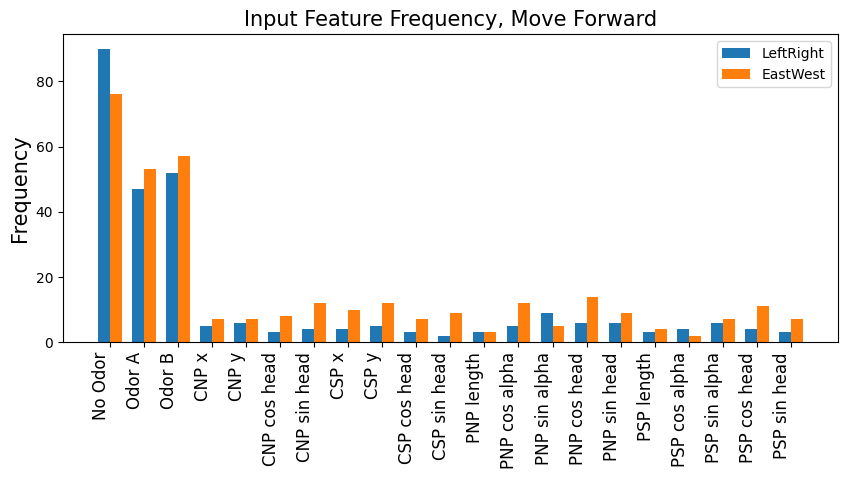

In [36]:
lr_input_array = np.array(lr_all_input_vectors_forward)
ew_input_array = np.array(ew_all_input_vectors_forward)
lr_input_counts = lr_input_array.sum(axis=0)
ew_input_counts = ew_input_array.sum(axis=0)
bar_width = 0.35

input_idx = np.arange(21)

fig, ax = plt.subplots(figsize=(10,4))

#plt.set_figsize(figsize=(10,4))
ax.bar(input_idx, lr_input_counts, width=bar_width, label='LeftRight')
ax.bar(input_idx + bar_width, ew_input_counts, width=bar_width, label='EastWest')
ax.set_xticks(input_idx + bar_width / 2, input_idx)
ax.legend()
ax.set_xticklabels(labels=input_labels, rotation=90, ha='right', fontsize=12)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_title('Input Feature Frequency, Move Forward', fontsize=15)
plt.savefig('inputffmf.png', dpi=300, bbox_inches='tight')

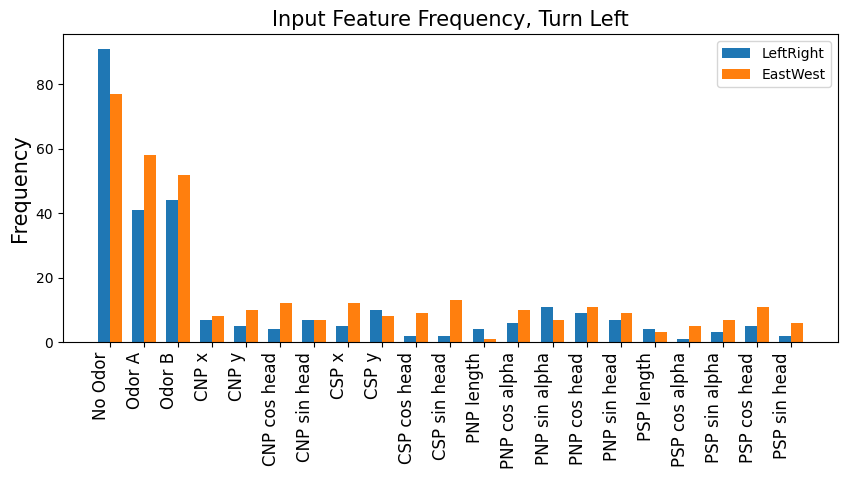

In [37]:
lr_input_array = np.array(lr_all_input_vectors_left)
ew_input_array = np.array(ew_all_input_vectors_left)
lr_input_counts = lr_input_array.sum(axis=0)
ew_input_counts = ew_input_array.sum(axis=0)
bar_width = 0.35

input_idx = np.arange(21)

fig, ax = plt.subplots(figsize=(10,4))

#plt.set_figsize(figsize=(10,4))
ax.bar(input_idx, lr_input_counts, width=bar_width, label='LeftRight')
ax.bar(input_idx + bar_width, ew_input_counts, width=bar_width, label='EastWest')
ax.set_xticks(input_idx + bar_width / 2, input_idx)
ax.legend()
ax.set_xticklabels(labels=input_labels, rotation=90, ha='right', fontsize=12)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_title('Input Feature Frequency, Turn Left', fontsize=15)
plt.savefig('inputfftl.png', dpi=300, bbox_inches='tight')

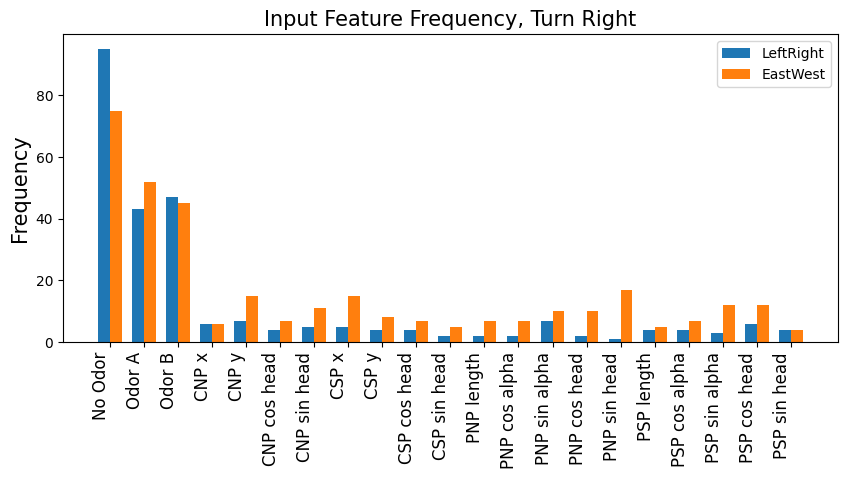

In [38]:
lr_input_array = np.array(lr_all_input_vectors_right)
ew_input_array = np.array(ew_all_input_vectors_right)
lr_input_counts = lr_input_array.sum(axis=0)
ew_input_counts = ew_input_array.sum(axis=0)
bar_width = 0.35

input_idx = np.arange(21)

fig, ax = plt.subplots(figsize=(10,4))

#plt.set_figsize(figsize=(10,4))
ax.bar(input_idx, lr_input_counts, width=bar_width, label='LeftRight')
ax.bar(input_idx + bar_width, ew_input_counts, width=bar_width, label='EastWest')
ax.set_xticks(input_idx + bar_width / 2, input_idx)
ax.legend()
ax.set_xticklabels(labels=input_labels, rotation=90, ha='right', fontsize=12)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_title('Input Feature Frequency, Turn Right', fontsize=15)
plt.savefig('inputfftr.png', dpi=300, bbox_inches='tight')

### PCA, t-SNE, etc.

In [67]:
lr_weights = []
ew_weights = []

for cat in [data_dir_lr, data_dir_ew]:

    for i in range(num_agents):
        
        # Loading Agent Model
        model_path = cat / f'trained-agent-state-{i}.pt'
        model.load_state_dict(torch.load(model_path, weights_only=True, map_location=torch.device('cpu')))
        model.eval()

        # Extracting Model Weights
        state_dict = model.state_dict()
        layer0_weights = state_dict['mlp.0.weight']
        layer1_weights = state_dict['mlp.1.weight']
        layer2_weights = state_dict['mlp.3.weight']
        layer3_weights = state_dict['mlp.5.weight']
        layer4_weights = state_dict['mlp.7.weight']
        weights = [layer0_weights,layer1_weights,layer2_weights,layer3_weights,layer4_weights]

        if cat==data_dir_lr:
            lr_weights.append(weights[0])
        else:
            ew_weights.append(weights[0])

flat_lr = [tensor.flatten().cpu().numpy() for tensor in lr_weights]
flat_ew = [tensor.flatten().cpu().numpy() for tensor in ew_weights]

X = np.array(flat_lr + flat_ew)  # Shape: (200, 10752)
labels = np.array([0]*len(flat_lr) + [1]*len(flat_ew))  # For coloring

print(X.shape)



(200, 10752)


In [83]:
from sklearn.decomposition import PCA

X_pca = PCA(n_components=50).fit_transform(X)
print(X_pca.shape)

(200, 50)


In [77]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X_pca)

In [72]:
print(X_tsne[0])

[-66.99701   38.813297]


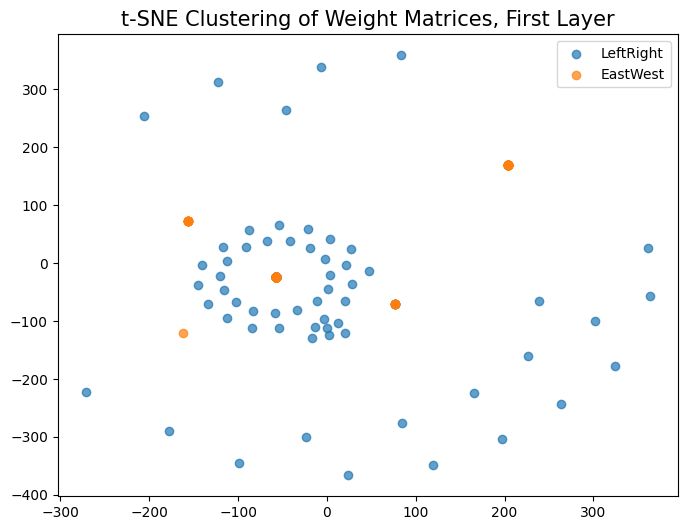

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[labels == 0, 0], X_tsne[labels == 0, 1], label='LeftRight', alpha=0.7)
plt.scatter(X_tsne[labels == 1, 0], X_tsne[labels == 1, 1], label='EastWest', alpha=0.7)
plt.legend()
plt.title('t-SNE Clustering of Weight Matrices, First Layer', fontsize=15)
plt.savefig('tSNElrew.png', dpi=300)
plt.show()